# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [29]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
from sklearn import svm
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Subsection 1

In [3]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

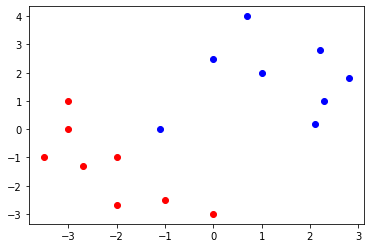

In [4]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

<img src="./1.jpeg" alt="SVM" width="800" height="500">


<img src="./2.jpeg" alt="SVM" width="800" height="500">


<img src="./3.jpeg" alt="SVM" width="800" height="500">


In [5]:
# Write your code here
def svm(X,y):

    w = cp.Variable(2); b = cp.Variable()

    # Define the constraints
    constraints = [y[i]*(w.T@X[i] + b) >= 1 for i in range(len(X))]

    # Define the objective function
    obj = cp.Minimize((1/2)*cp.sum_squares(w))

    # Define the problem
    prob = cp.Problem(obj, constraints)

    # Solve the problem
    prob.solve()
    return prob, w, b

In [6]:
def plot_helper(prob, w, b):
    print("Optimal value", prob.value)
    print("w = ", w.value)
    print("b = ", b.value)
    slope = -(w.value[0]/w.value[1])
    print("slope: " + str(slope))
    intercept = -(b.value/w.value[1])
    print("intercept: " + str(intercept))
    return slope, intercept

In [7]:
prob, w, b = svm(X,y)
slope, intercept = plot_helper(prob, w, b)

Optimal value 2.3629489603024565
w =  [-1.73913043 -1.30434783]
b =  -2.91304347826087
slope: -1.3333333333333333
intercept: -2.2333333333333343


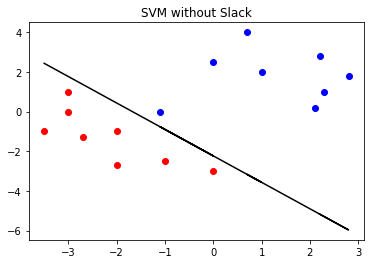

In [8]:
def plot_graph(slope, intercept, title="SVM without Slack"):
    x_val = []
    y_val = []

    for i in range(len(X)):
        x_val.append(X[i][0])
        y_hat = slope * x_val[i] + intercept
        y_val.append(y_hat)
    plt.title(title)
    plt.plot(x_val, y_val, color='Black')
    plot_points(X, y)
    plt.show()

plot_graph(slope, intercept)

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [9]:
# Write your code here

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

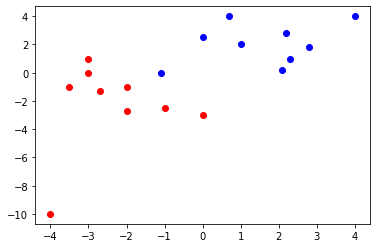

In [10]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [-4,-10], [4, 4]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1])
plot_points(X, y)
plt.show()

Optimal value 2.3629489603024587
w =  [-1.73913043 -1.30434783]
b =  -2.9130434782608705
slope: -1.3333333333333333
intercept: -2.2333333333333334


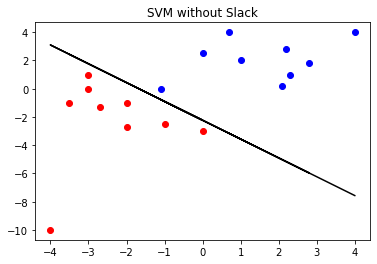

In [11]:
# Solve for the decision boundary using this modified dataset
prob, w, b = svm(X,y)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept)

<b>Observation</b> <br>
Yes the decision boundary has changed and now we can observe that due to single outlier point the decision boundary may not work well on the testing data hence we need to introduce softening of the decision boundary in the form of Slack.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [12]:
def soft_svm(X,y, C):
    m, n = np.shape(X)

    # Create two scalar optimization variables.
    w = cp.Variable(n) # n = 2 here
    b = cp.Variable()
    epsilon = cp.Variable(m) # m = no. of datapoints 

    # Define the constraints
    constraints = []
    for i in range(len(X)):
        constraints.append(y[i] * (w.T @ X[i] + b) >= 1-epsilon[i])
        constraints.append(epsilon[i]>=0)

    # Define the objective function
    obj = cp.Minimize((1/2)*cp.sum_squares(w) + C*cp.sum(epsilon))

    # Define the problem
    prob = cp.Problem(obj, constraints)

    # Solve the problem
    prob.solve()

    return prob, w, b


Optimal value 0.09495328307392997
w =  [-0.22506809 -0.19858949]
b =  0.013672178988326457
slope: -1.1333333333333346
intercept: 0.06884643644378939


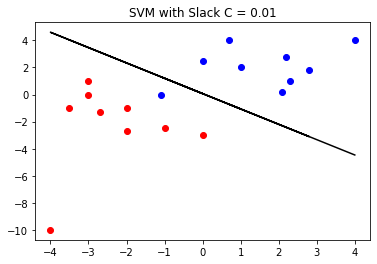

In [13]:
# Write your code here for C= 0.01
prob, w, b = soft_svm(X,y, 0.01)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept, "SVM with Slack C = 0.01")

Optimal value 0.3045548922462842
w =  [-0.38493724 -0.35146444]
b =  -0.12133891213389113
slope: -1.0952380952380951
intercept: -0.345238095238095


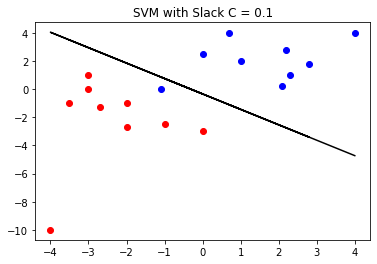

In [14]:
# Write your code here for C= 0.1
prob, w, b = soft_svm(X,y, 0.1)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept, "SVM with Slack C = 0.1")

Optimal value 2.362948960302459
w =  [-1.73913043 -1.30434783]
b =  -2.913043478260871
slope: -1.3333333333333333
intercept: -2.2333333333333334


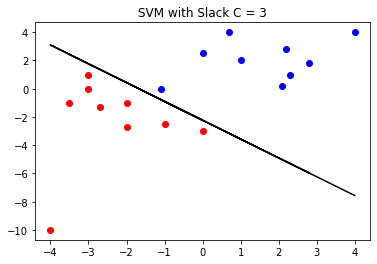

In [15]:
# Write your code here for C= 3
prob, w, b = soft_svm(X,y, 3)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept, "SVM with Slack C = 3")

Optimal value 2.3629489603024587
w =  [-1.73913043 -1.30434783]
b =  -2.913043478260871
slope: -1.3333333333333333
intercept: -2.2333333333333334


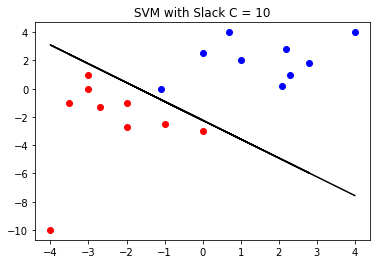

In [16]:
# Write your code here for C= 10
prob, w, b = soft_svm(X,y, 10)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept, "SVM with Slack C = 10")

Optimal value 2.362948960302459
w =  [-1.73913043 -1.30434783]
b =  -2.913043478260871
slope: -1.3333333333333333
intercept: -2.2333333333333334


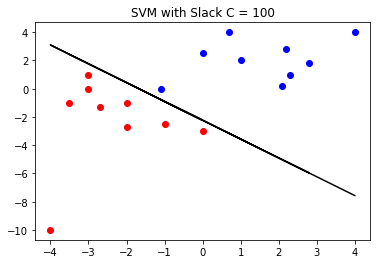

In [17]:
# Write your code here for C= 100
prob, w, b = soft_svm(X,y, 100)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept, "SVM with Slack C = 100")

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

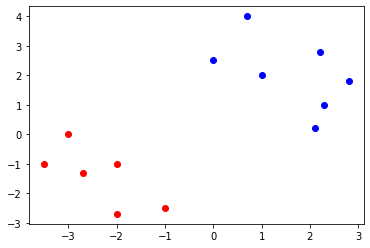

In [18]:
# Write your Code here
# The Suppot Vectors are (-3,1) -> 1, (0,-3) -> 1, (-1.1,0) -> -1

X = np.array([[-3.5, -1], [-3, 0], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()


Optimal value 0.13585196337599129
w =  [-0.38493724 -0.35146444]
b =  -0.12133891213389116
slope: -1.0952380952380956
intercept: -0.3452380952380952


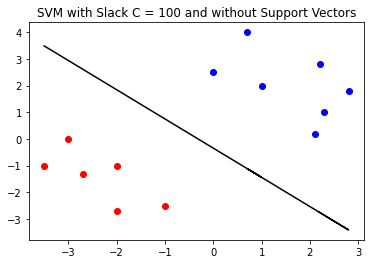

In [19]:
prob, w, b = soft_svm(X,y, 100)
slope, intercept = plot_helper(prob, w, b)
plot_graph(slope, intercept, "SVM with Slack C = 100 and without Support Vectors")

Yes the Decision Boundary Changed after the deletion of the support vectors. This is because the support vectors are the points which are closest to the decision boundary and hence removing them will change the decision boundary.

### Subsection 2

In [20]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Defaulting to user installation because normal site-packages is not writeable
--2023-03-22 13:10:30--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  2.22MB/s    in 4.1s    

2023-03-22 13:10:34 (2.28 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-22 13:10:35--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [ap

In [21]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [22]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [23]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [24]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [26]:
!pip install prettytable
from prettytable import PrettyTable
def print_report(report):
    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]
    for class_name, metrics in report.items():
        if class_name in ["accuracy"]:
            continue
        row = [class_name, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']]
        table.add_row(row)
    print(table)
    print()


Defaulting to user installation because normal site-packages is not writeable


In [27]:
from sklearn import metrics
import gc

def print_report_helper(predictions):
    confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
    print("Confusion Matrix")
    print(confusion)
    print()
    print("Accuracy Score = ",metrics.accuracy_score(y_true=y_test, y_pred=predictions))
    class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions, output_dict=True)
    print_report(class_wise)
    gc.collect()

#### C Paramter and Gamma Parameter of Linear SVM

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def helper():
    parameters = {'C':[1, 10, 100, 1000], 'gamma': [0.00004, 0.000004, 0.0000004, 0.00000004, 0.000001, 0.000000004],'kernel':['linear']}
    grid = GridSearchCV(SVC(),parameters)
    grid.fit(X_train,y_train)

    print(grid.best_params_)
    gamma = grid.best_params_['gamma']
    C = grid.best_params_['C']
    print(grid.score(X_test,y_test))

    best_kernel = svm.SVC(kernel='linear', C=C, gamma=gamma)
    best_kernel.fit(X_train, y_train)
    predictions = best_kernel.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)
    print_report_helper(predictions)
    print("Test Accuracy = ", test_accuracy)

helper()


{'C': 1, 'gamma': 4e-05, 'kernel': 'linear'}
0.8893333333333333
Confusion Matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Accuracy Score =  0.8893333333333333
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|      0       | 0.9290322580645162 | 0.9696969696969697 | 0.9489291598023064 |   297   |
|      1       | 0.9390581717451524 | 0.9797687861271677 | 0.958981612446959  |   346   |


#### Linear Kernel

In [ ]:

import pandas as pd

linear_kernel = svm.SVC(kernel='linear') # Linear Kernel
linear_kernel.fit(X_train, y_train) # Fit
predictions_linear = linear_kernel.predict(X_test) # Predict

In [ ]:
print_report_helper(predictions_linear)

Confusion Matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Accuracy Score =  0.8893333333333333
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|      0       | 0.9290322580645162 | 0.9696969696969697 | 0.9489291598023064 |   297   |
|      1       | 0.9390581717451524 | 0.9797687861271677 | 0.958981612446959  |   346   |
|      2       | 0.8719512195121951 | 0.9166666666666666 | 0.893

#### Polynomial Kernel

In [ ]:
poly_kernel = svm.SVC(kernel='poly')
poly_kernel.fit(X_train, y_train)
predictions_poly = poly_kernel.predict(X_test)

In [ ]:
print_report_helper(predictions_poly)

Confusion Matrix
[[278   2   1   0   0   9   4   1   2   0]
 [  0 342   1   2   0   0   1   0   0   0]
 [  1   8 286   4   3   0   1   6   2   1]
 [  0   6   6 249   0   9   0   4   5   0]
 [  1   4   1   0 260   0   4   0   0  11]
 [  1   3   0   7   1 241   3   2   5   2]
 [  6   2   1   0   5   2 274   0   0   0]
 [  0  10   5   0   4   0   1 265   1  17]
 [  1   1   1   8   6   7   0   3 271   3]
 [  0   7   0   4  22   2   0   4   1 286]]

Accuracy Score =  0.9173333333333333
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|      0       | 0.9652777777777778 | 0.936026936026936  | 0.9504273504273505 |   297   |
|      1       | 0.8883116883116883 | 0.9884393063583815 | 0.9357045143638851 |   346   |
|      2       | 0.9470198675496688 | 0.9166666666666666 | 0.931

#### RBF Kernel

In [ ]:
rbf_kernel = svm.SVC(kernel='rbf')
rbf_kernel.fit(X_train, y_train)
predictions_rbf = rbf_kernel.predict(X_test) # Predict

In [ ]:
print_report_helper(predictions_rbf)

Confusion Matrix
[[293   0   1   0   1   1   1   0   0   0]
 [  0 339   2   2   0   1   1   1   0   0]
 [  0   0 298   5   2   0   1   3   3   0]
 [  1   0   5 256   0   9   0   4   4   0]
 [  1   1   2   0 267   0   3   0   0   7]
 [  2   1   0   7   0 248   3   1   1   2]
 [  5   0   5   0   3   5 272   0   0   0]
 [  0   6   6   1   1   0   0 265   2  22]
 [  0   1   2   5   3   9   2   3 271   5]
 [  2   3   1   5  17   1   0   4   1 292]]

Accuracy Score =  0.9336666666666666
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|      0       | 0.9638157894736842 | 0.9865319865319865 | 0.9750415973377704 |   297   |
|      1       | 0.9658119658119658 | 0.9797687861271677 | 0.9727403156384505 |   346   |
|      2       | 0.9254658385093167 | 0.9551282051282052 | 0.940

#### Sigmoid Kernel

In [ ]:
sigmoid_kernel = svm.SVC(kernel='sigmoid')
sigmoid_kernel.fit(X_train, y_train)
predictions_sigmoid = sigmoid_kernel.predict(X_test)

In [ ]:
print_report_helper(predictions_sigmoid)

Confusion Matrix
[[278   0   2   0   0  15   2   0   0   0]
 [  0 339   0   3   0   3   1   0   0   0]
 [  8   5 271   5   5   5   1   4   7   1]
 [  6   2  12 210   1  37   0   5   3   3]
 [  4   2   2   0 247   1   5   1   0  19]
 [  9   4   0  33   3 200   2   1  11   2]
 [ 15   0  14   0   6  11 243   0   1   0]
 [  3   9   6   0   5   1   0 251   3  25]
 [  5   8   6   9   5  21   4   4 230   9]
 [  6   3   5   4  30   4   0  15   3 256]]

Accuracy Score =  0.8416666666666667
+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|      0       | 0.8323353293413174 | 0.936026936026936  | 0.8811410459587955 |   297   |
|      1       | 0.9112903225806451 | 0.9797687861271677 | 0.9442896935933147 |   346   |
|      2       | 0.8522012578616353 | 0.8685897435897436 | 0.860

#### RBF Kernel and Parameter Tweaking

The RBF Kernel has shown the best accuracy among all the tested kernels

In [ ]:
gamma_vals = [0.00001, 0.00004, 0.000001, 0.000004, 0.0000001, 0.0000004, 0.00000001, 0.00000004, 0.000000001, 0.000000004]
accuracy_lis = []

In [ ]:
for gamma in gamma_vals:
    best_kernel = svm.SVC(kernel='rbf', C=10, gamma=gamma)
    best_kernel.fit(X_train, y_train)
    predictions = best_kernel.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)
    accuracy_lis.append(test_accuracy)
    print("Accuracy for gamma = ",gamma," is ",test_accuracy)

Accuracy for gamma =  1e-05  is  0.18333333333333332
Accuracy for gamma =  4e-05  is  0.11533333333333333
Accuracy for gamma =  1e-06  is  0.9013333333333333
Accuracy for gamma =  4e-06  is  0.25633333333333336
Accuracy for gamma =  1e-07  is  0.9296666666666666
Accuracy for gamma =  4e-07  is  0.9436666666666667
Accuracy for gamma =  1e-08  is  0.903
Accuracy for gamma =  4e-08  is  0.916
